In [1]:
import seaborn as sns

In [2]:
df = catalog.load("MICRODADOS_ENEM_2021")

[01/10/23 17:22:59] INFO     Loading data from 'MICRODADOS_ENEM_2021' (CSVDataSet)...           ]8;id=328158;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=196665;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [3]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [8]:
id_cols = ["NU_INSCRICAO"]

In [9]:
flag_cols = ["TP_ST_CONCLUSAO", "IN_TREINEIRO", "CO_MUNICIPIO_ESC", "TP_PRESENCA_MT", "TP_ESCOLA", "TP_ENSINO"]

In [10]:
calc_cols = ["NU_NOTA_MT"]

In [12]:
filtered_df = df.query("TP_PRESENCA_MT == 1")

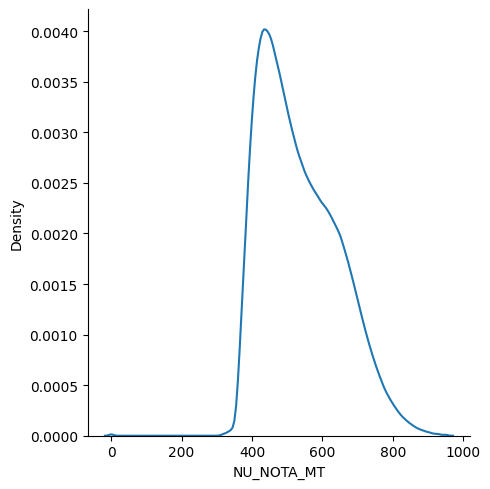

In [13]:
sns.displot(data=filtered_df, x="NU_NOTA_MT", kind="kde");

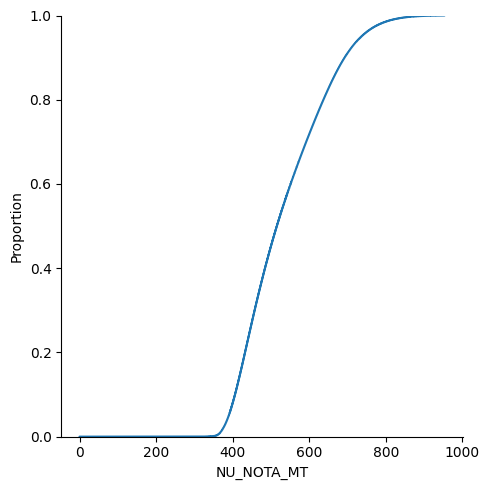

In [14]:
sns.displot(data=filtered_df, x="NU_NOTA_MT", kind="ecdf");